# 손글씨 숫자 인식
- opencv를 이용하여
- CNN을 사용하지 않는 간단한 버전
- 8x8 픽셀 숫자 데이터 5620개 사용

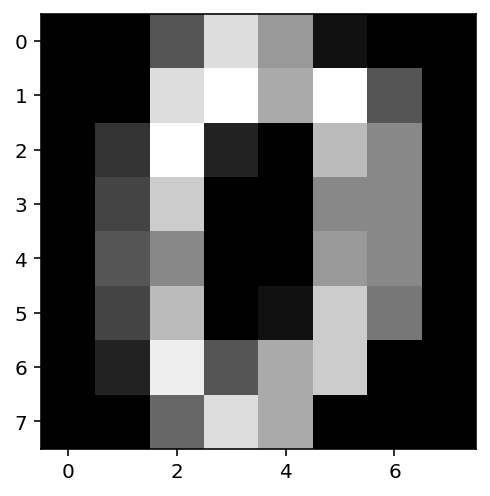

In [9]:
import cv2
import matplotlib.pyplot as plt
from sklearn import datasets
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap="gray")
plt.show()

In [4]:
type(digits)

sklearn.utils.Bunch

In [5]:
digits.images.shape

(1797, 8, 8)

In [6]:
digits.data.shape

(1797, 64)

In [7]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [8]:
# 각 픽셀은 0~15의 숫자로 표현된다, 크면 밝은 색
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


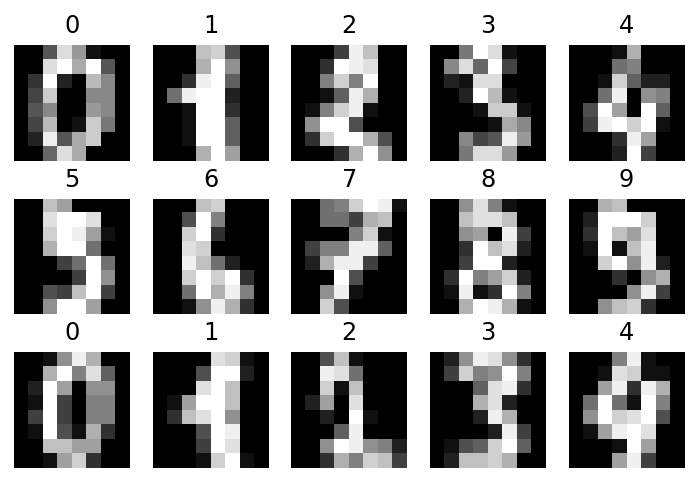

In [10]:
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.axis("off")
    plt.title(str(digits.target[i]))
    plt.imshow(digits.images[i], cmap="gray")

plt.show()

In [41]:
x = digits.data
# x = x.image.reshape((-1, 64))

from sklearn.model_selection import train_test_split
from sklearn import datasets, svm, metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier

y = digits.target
x_train, x_test, y_train, y_test = train_test_split(x, y)

clf = svm.SVC(probability=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

lin = SGDClassifier()
lin.fit(x_train, y_train)
y_pred = lin.predict(x_test)
print(accuracy_score(y_test, y_pred))


0.9822222222222222
0.9422222222222222


In [42]:
# 학습한 모델을 저장
import joblib
joblib.dump(clf, 'digits.pkl')
joblib.dump(lin, 'digits-lin.pkl')

['digits-lin.pkl']

In [44]:
def predict_digit(filename):
  # 학습한 데이터 읽어 들이기
    model = joblib.load("digits.pkl")
    my_img = cv2.imread(filename)
    my_img = cv2.cvtColor(my_img, cv2.COLOR_BGR2GRAY)
    my_img = cv2.resize(my_img, (8, 8))
    my_img = 15 - my_img // 16 
    # 흑백 반전
    my_img = my_img.reshape((-1, 64))
    res = model.predict_proba(my_img)
    return res[0]

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 12013  100 12013    0     0  50474      0 --:--:-- --:--:-- --:--:-- 50474
[0.0181947  0.07109956 0.31938088 0.04158437 0.16863739 0.02236213
 0.07793429 0.09374026 0.17027422 0.0167922 ]
2


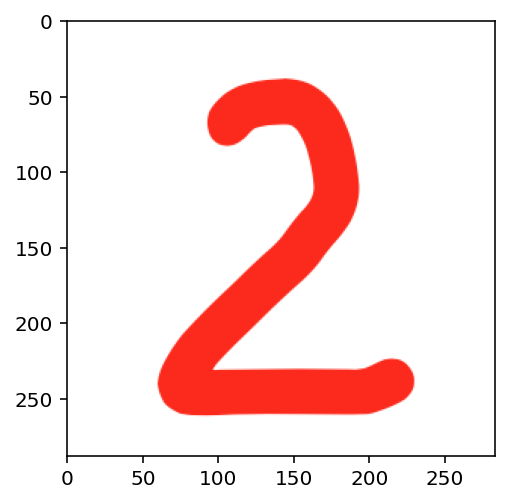

In [47]:
# 이미지 파일을 지정해서 실행하기
import numpy as np
!curl https://raw.githubusercontent.com/StillWork/data/master/digit2.png\
    -o digit2.png
img = cv2.imread("digit2.png")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
n = predict_digit("digit2.png")
# print("digit2.png = " + str(n))
print(n)
print(np.argmax(n))
plt.show()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24744  100 24744    0     0  90637      0 --:--:-- --:--:-- --:--:-- 90306
[0.0493221  0.09897808 0.03908256 0.02531798 0.20339347 0.0174417
 0.01132015 0.09031164 0.07852634 0.38630598]
9


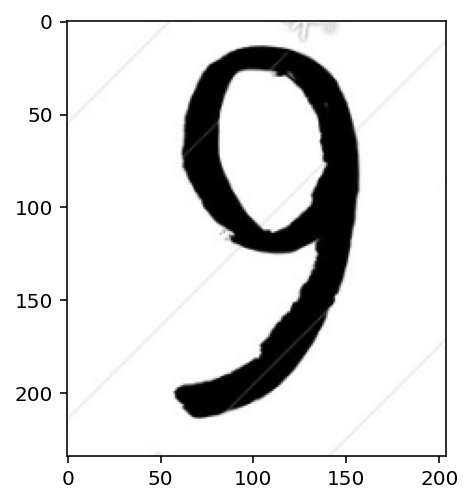

In [46]:
!curl https://raw.githubusercontent.com/StillWork/data/master/digit9.png\
    -o digit9.png
img = cv2.imread("digit9.png")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
n = predict_digit("digit9.png")
# print("digit9.png = " + str(n))
print(n)
print(np.argmax(n))
plt.show()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 17503  100 17503    0     0  38895      0 --:--:-- --:--:-- --:--:-- 38809
[0.0640689  0.08891135 0.06655696 0.04412483 0.31055454 0.06105795
 0.06860328 0.11343827 0.12356621 0.05911769]
4


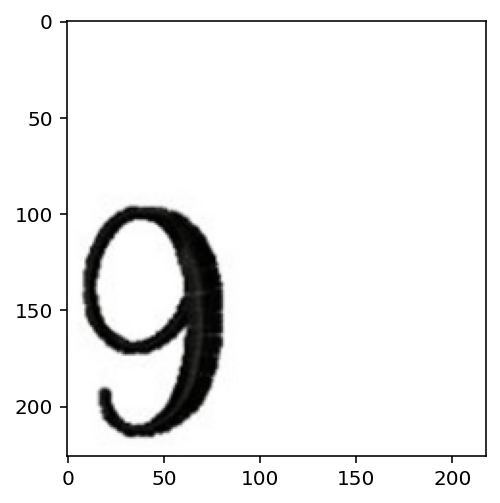

In [48]:
!curl https://raw.githubusercontent.com/StillWork/data/master/digit9-2.png\
    -o digit9-2.png
img = cv2.imread("digit9-2.png")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
n = predict_digit("digit9-2.png")
# print("digit9-2.png = " + str(n))
print(n)
print(np.argmax(n))

plt.show()